In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from langdetect import detect

In [3]:
data = pd.read_csv("coursera_reviews.csv", encoding="utf-8")
data.head()

C:\Users\diqiao001\AppData\Local\Temp\ipykernel_7732\2791335872.py:1: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("coursera_reviews.csv", encoding="utf-8")


,reviews,reviewers,date_reviews,rating,course_id
0,I struggled with some of the instruction as I ...,By Janny v R J,"Apr 01, 2016",3.0,python
1,Sir is an amazing teacher and expresses his id...,By Aman V,"Apr 01, 2016",4.0,python
2,"I recommend widely this course, it reaches ver...",By Angélica S,"Apr 01, 2016",5.0,food-and-health
3,"If you no nothing about this topic, lectures a...",By Jolana L,"Apr 01, 2016",5.0,food-and-health
4,Highly recommended course!,By Narine A,"Apr 01, 2016",5.0,food-and-health


In [4]:
data.shape

(1048575, 5)

In [5]:
# Load English stopwords
english_stopwords = set(stopwords.words("english"))

def is_english(text):
    try:
        language = detect(text)
    except:
        return False

    if language == "en":
        return True
    else:
        return False

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Tokenize
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in english_stopwords]
    
    # Stemming
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words if len(word) > 1]
    
    # Reassemble into a string
    processed_text = " ".join(words)
    
    return processed_text

# Remove non-English reviews
data = data[data["reviews"].apply(is_english)]

# Preprocess the reviews column
data["processed_reviews"] = data["reviews"].apply(preprocess_text)

# Save preprocessed data
data.to_csv("coursera_reviews_processed.csv", index=False)

In [6]:
import pandas as pd

# Load preprocessed data
data = pd.read_csv("coursera_reviews_processed.csv")

# Get the number of rows in the dataframe
num_valid_reviews = data.shape[0]  # or use: num_valid_reviews = len(data)

print(f"There are {num_valid_reviews} valid reviews left after preprocessing.")

There are 289839 valid reviews left after preprocessing.


In [7]:
import nltk
from nltk.corpus import words
# Download the words corpus if you haven't done so
nltk.download("words")

# Combine all reviews into a single text
all_reviews = " ".join(data["processed_reviews"].astype(str))

# Tokenize combined text
tokens = nltk.word_tokenize(all_reviews)

# Filter English words
english_words = set(words.words())
english_terms = [token for token in tokens if token.lower() in english_words]

# Count English terms
english_terms_count = len(english_terms)

print(f"The preprocessed data contains {english_terms_count} English terms.")

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\diqiao001\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


The preprocessed data contains 2599421 English terms.


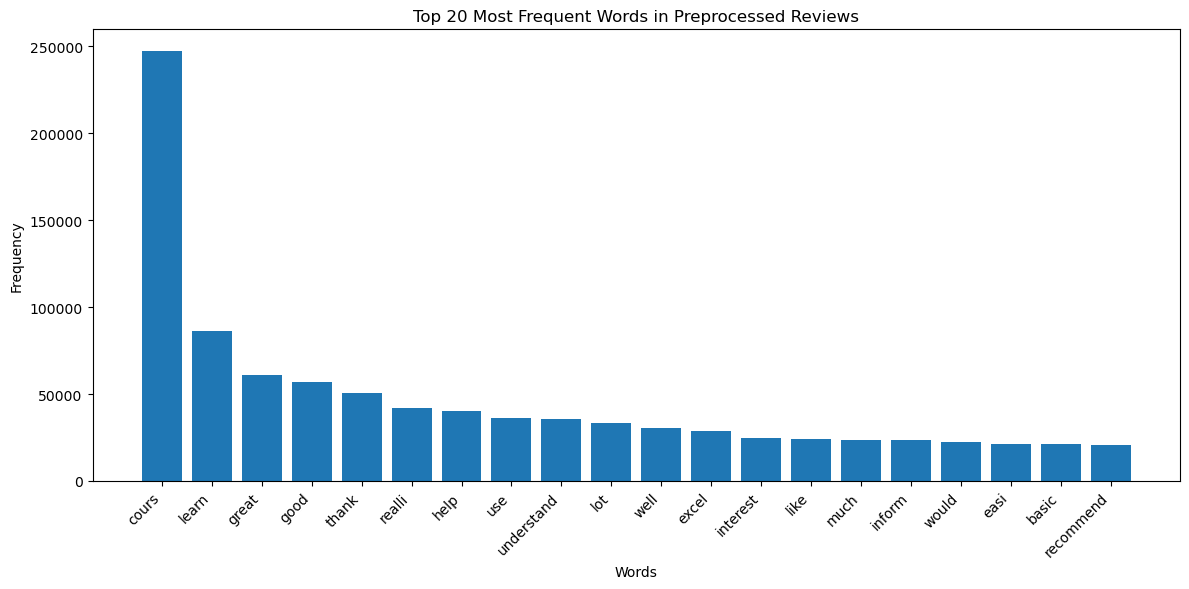

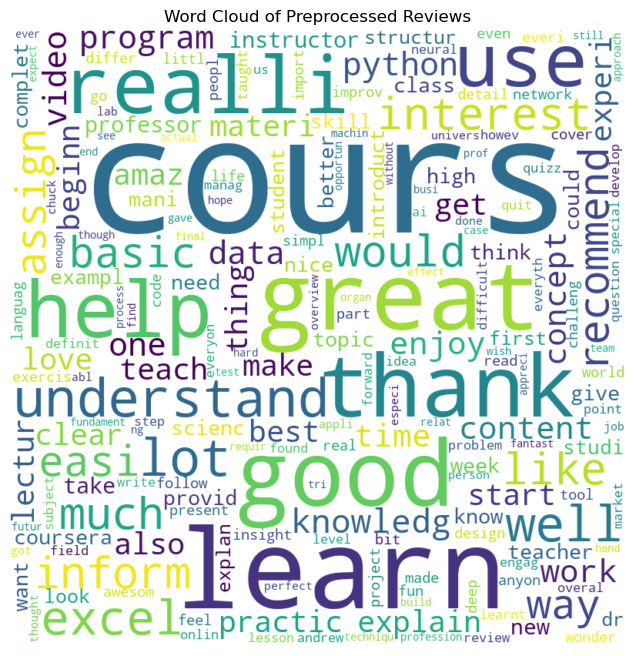

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Combine all reviews into a single text
all_reviews = " ".join(data["processed_reviews"].astype(str))

# Tokenize combined text
tokens = nltk.word_tokenize(all_reviews)

# Count the occurrences of each token
token_counts = Counter(tokens)

# Find the 20 most common words
most_common_words = token_counts.most_common(20)

# Plot the bar chart for the 20 most common words
plt.figure(figsize=(12, 6))  # Increase figure size
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Preprocessed Reviews")

# Rotate x-axis labels and adjust spacing
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust spacing between subplots

plt.show()

# Plot the word cloud
wordcloud = WordCloud(width=800, height=800, background_color="white").generate_from_frequencies(token_counts)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Preprocessed Reviews")
plt.show()